## Introduction

In this project we'll analyze the US Super store data.The dataset contains sales and profit and other data's from 2014-18

First we need to import libraries

In [1]:
#Basaic libraries

import numpy as np
import pandas as pd
import os

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Data Preparation & Cleaning

Checking for Duplicated Rows

In [6]:
df.duplicated().sum()

0

#### Drop Unnecessary Columns


In [7]:
df.drop(['Row ID','Order ID' ,'Customer ID','Postal Code' , 'Product ID'],axis=1,inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.Country.unique()

array(['United States'], dtype=object)

We will Drop Country Column because the analysis is on United States only


In [9]:
df.drop(['Country'],axis=1,inplace=True)

## Exploratory Analysis and Visualization



HeatMap Graph Shows the Correlation between the numerical Columns

<AxesSubplot:>

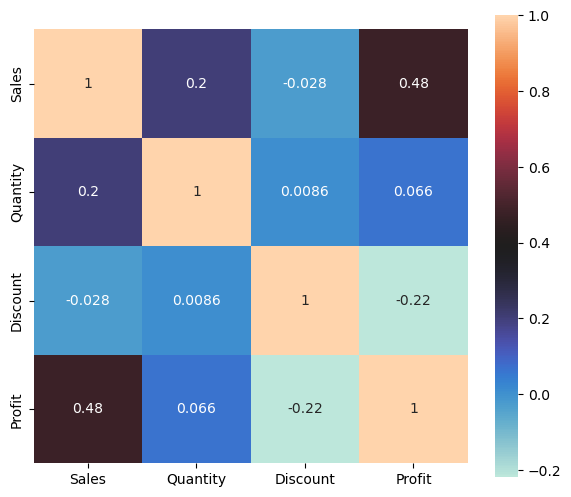

In [10]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='icefire')

## Category and Sub-category Analysis

#### Q: Which is the best Category in terms of sales,discount and profit?

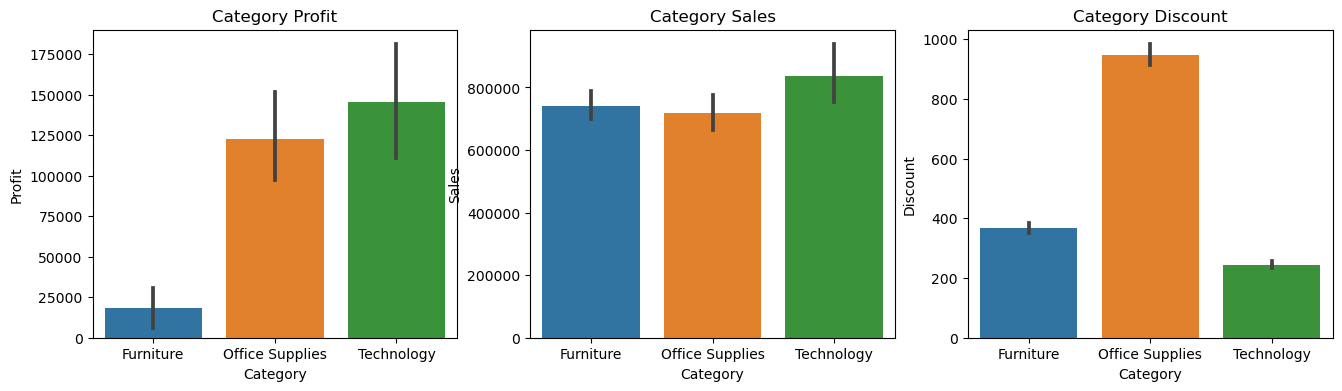

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Use the axes for plotting
sns.barplot(x='Category', y='Profit', estimator=sum, data=df, ax=axes[0])
axes[0].set_title('Category Profit')

sns.barplot(x='Category', y='Sales', estimator=sum, data=df, ax=axes[1])
axes[1].set_title('Category Sales')

sns.barplot(x='Category', y='Discount', estimator=sum, data=df, ax=axes[2])
axes[2].set_title('Category Discount')

plt.show()


#### Q:Which year makes more profit and sales ?

For that we need to create a new column named Year

In [13]:
df['Year'] = df['Order Date'].dt.year
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


Text(0.5, 1.0, 'Total Sales')

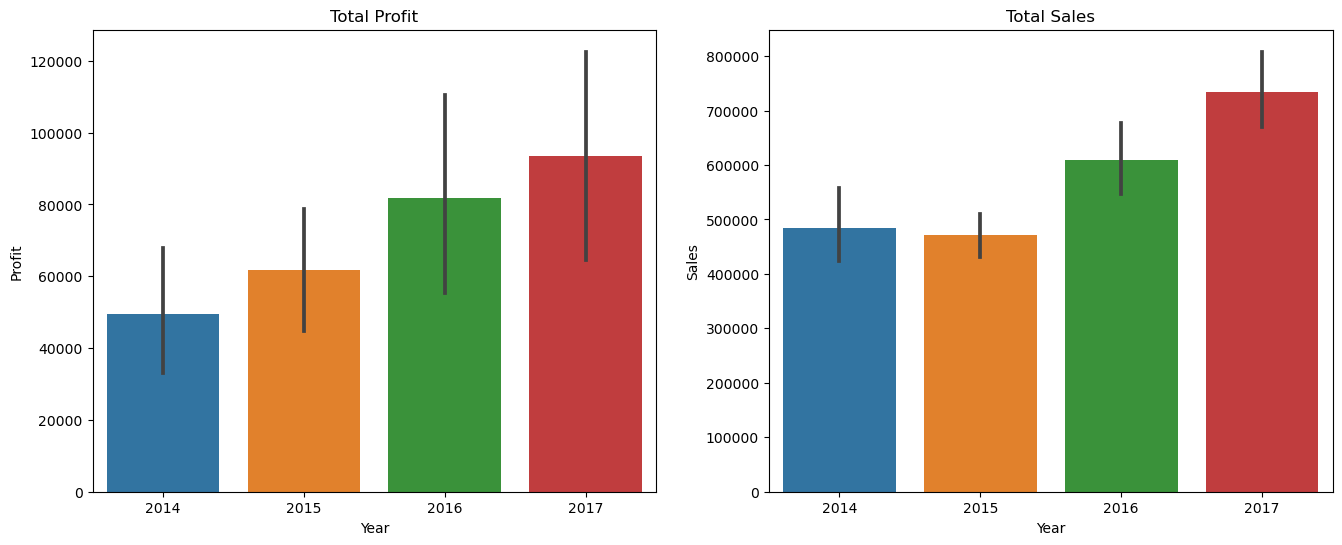

In [21]:
fig , axes = plt.subplots(1,2 , figsize=(16,6))

sns.barplot(x='Year',y='Profit', estimator=sum , data = df, ax= axes[0])
axes[0].set_title('Total Profit')

sns.barplot(x='Year', y ='Sales', estimator=sum, data = df, ax = axes[1])
axes[1].set_title('Total Sales')

#### Q: Which Category makes more Sales in each Year?

Text(0.5, 1.0, 'Total Sales')

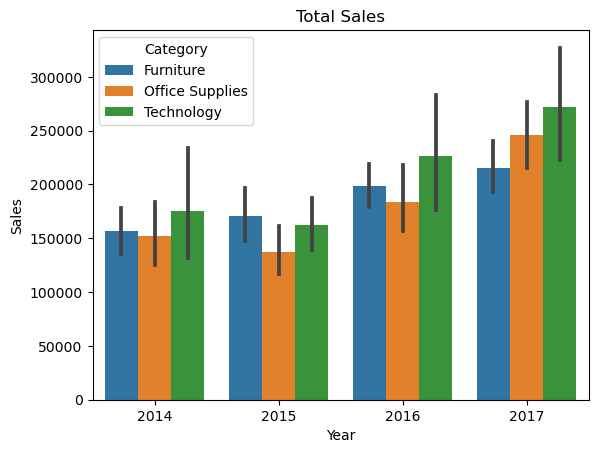

In [25]:
sns.barplot(x='Year', y='Sales', estimator=sum , data = df, hue='Category')
plt.title('Total Sales')

#### Q: Which Category makes more Profit in each Year?

Text(0.5, 1.0, 'Total Profit')

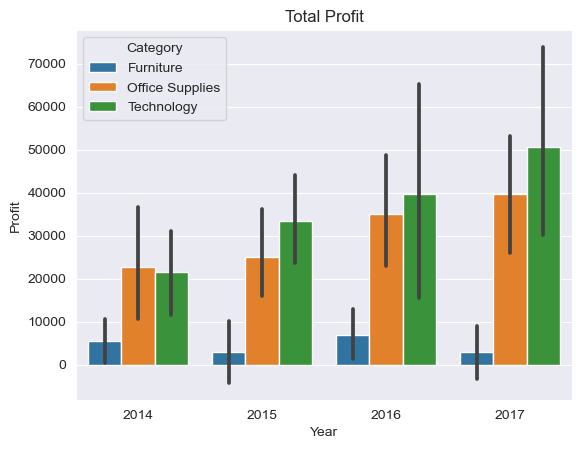

In [35]:
sns.set_style('darkgrid')
sns.barplot(x='Year', y='Profit', estimator=sum , data = df, hue='Category')
plt.title('Total Profit')

here we can see that 2015 and 2017 has loss on furnitue so lets look on it

In [32]:
df[((df['Year']==2015) | (df['Year']==2017))&(df['Category']=='Furniture')]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
23,2017-07-16,2017-07-18,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,2017
24,2015-09-25,2015-09-30,Standard Class,Emily Burns,Consumer,Orem,Utah,West,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,2015
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,2015
29,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,2017-06-01,2017-06-03,Second Class,Helen Wasserman,Corporate,Indianapolis,Indiana,Central,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464,2017
9955,2015-12-14,2015-12-16,Second Class,Darren Budd,Corporate,Los Angeles,California,West,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",273.5680,2,0.20,10.2588,2015
9962,2015-03-19,2015-03-22,First Class,Corinna Mitchell,Home Office,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704,2015
9980,2015-09-06,2015-09-09,Second Class,Shaun Weien,Consumer,Lafayette,Louisiana,South,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548,2015


Text(0.5, 1.0, 'Profit of Furniture Sub-Category in 2015 and 2017')

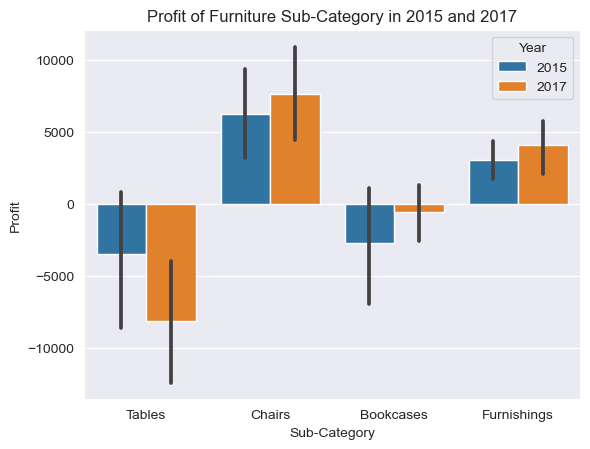

In [37]:
sns.barplot(x='Sub-Category', y='Profit',estimator=sum, hue='Year', data=df[((df['Year']==2015) | (df['Year']==2017))&(df['Category']=='Furniture')])
plt.title('Profit of Furniture Sub-Category in 2015 and 2017')

Here we can see that Tables and Bookcases having lose on 2015 and 2017

#### Q: which is the most sold sub-Category ?

In [69]:
most_sold=pd.DataFrame(df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False))


<AxesSubplot:title={'center':'Most sold Sub-Category'}, xlabel='Sales', ylabel='Sub-Category'>

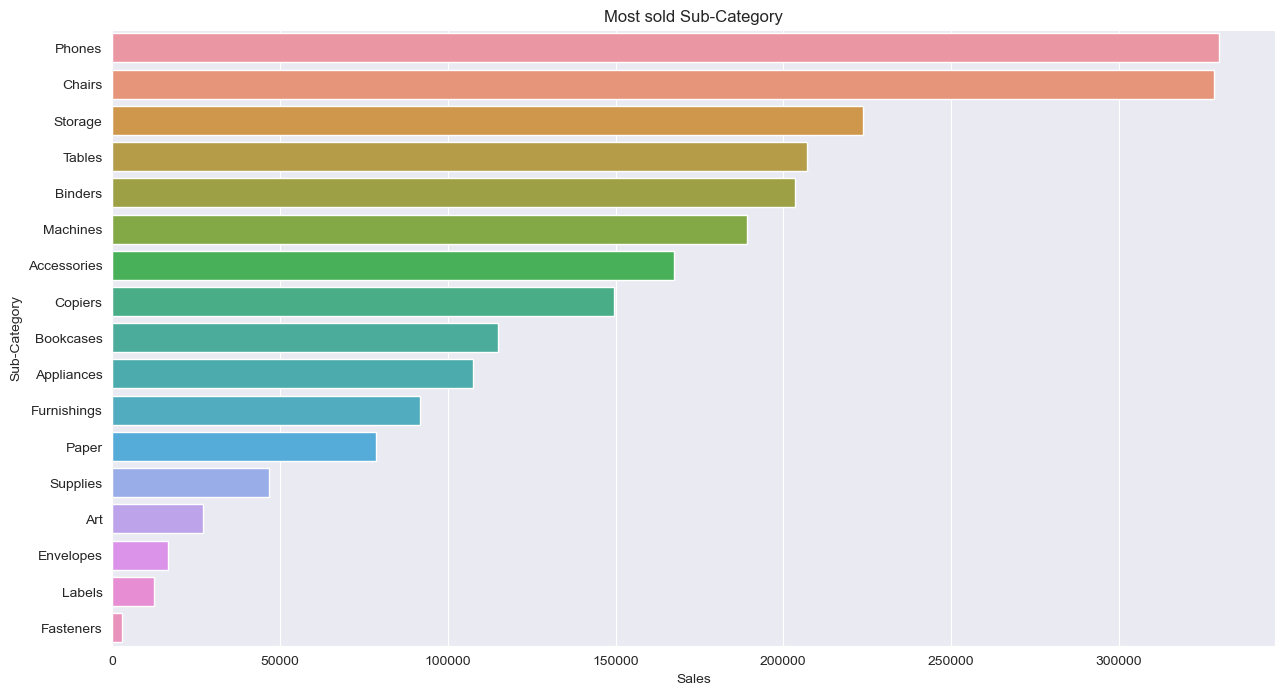

In [63]:
plt.figure(figsize=(15,8))
plt.title('Most sold Sub-Category')
sns.barplot(x=most_sold.Sales, y=most_sold.index, data=most_sold)


#### Q: Which is the most profitable Sub-Category ?

<AxesSubplot:title={'center':'Most Profitable Sub-Category'}, xlabel='Profit', ylabel='Sub-Category'>

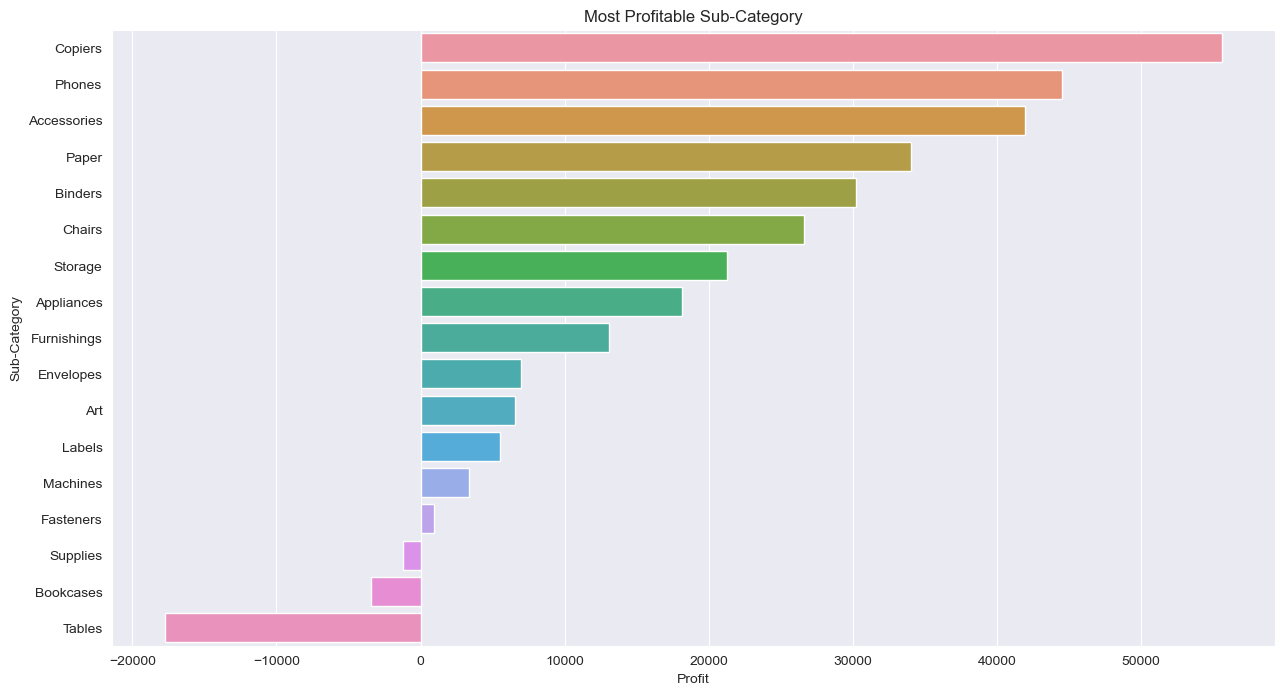

In [68]:
plt.figure(figsize=(15,8))
plt.title('Most Profitable Sub-Category')
sns.barplot(x=most_profitable.Profit, y=most_profitable.index)

#### Q: Which is the most Profitable and Sold Sub-category under Furniture Category ?

Text(0.5, 1.0, 'Total Profit')

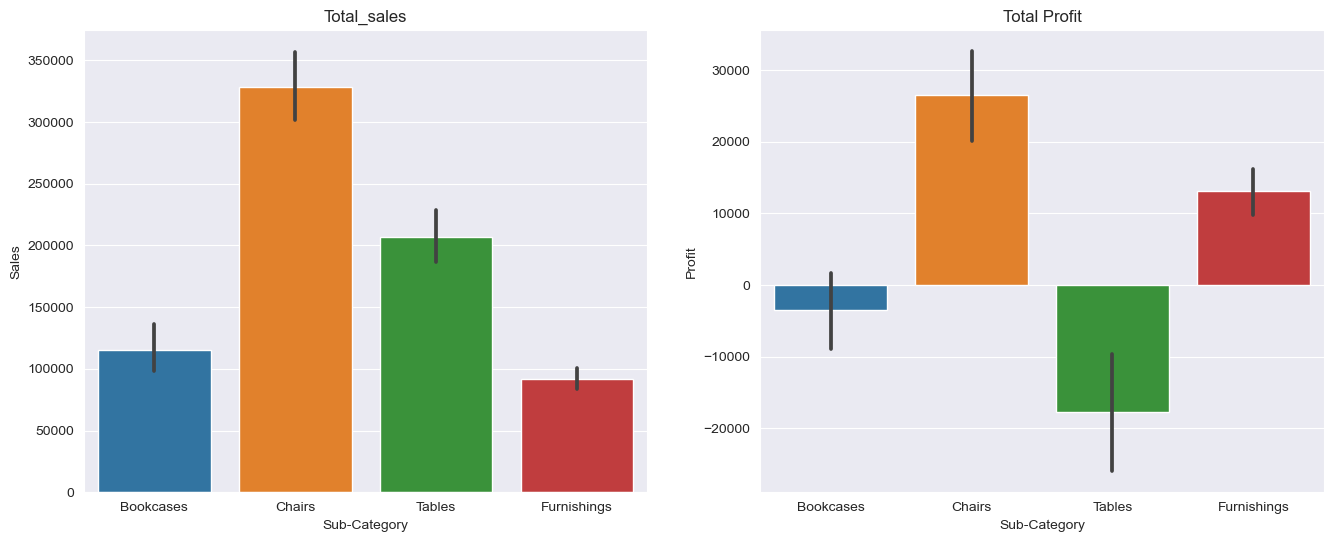

In [73]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.barplot(x='Sub-Category',y='Sales',estimator=sum, data = df[(df['Category']=='Furniture')],ax=axes[0])
axes[0].set_title('Total_sales')

sns.barplot(x='Sub-Category',y='Profit',estimator=sum, data = df[(df['Category']=='Furniture')],ax=axes[1])
axes[1].set_title('Total Profit')

#### Q: Which is the most Profitable and Sold Sub-category under Technology Category ?

Text(0.5, 1.0, 'Total Profit')

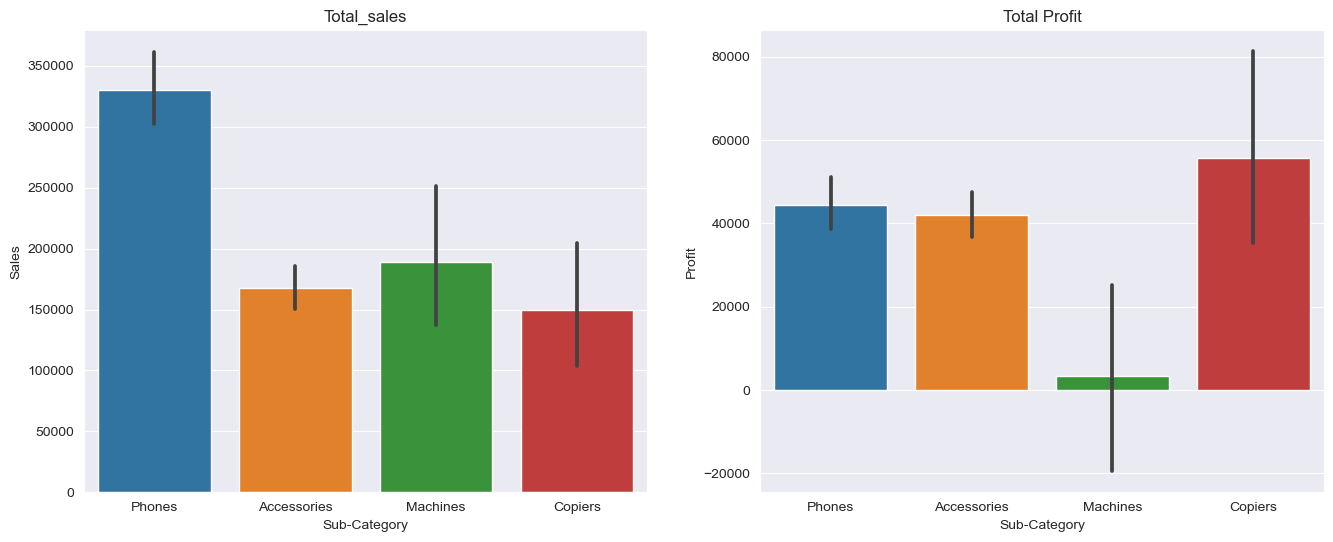

In [77]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.barplot(x='Sub-Category',y='Sales',estimator=sum, data = df[(df['Category']=='Technology')],ax=axes[0])
axes[0].set_title('Total_sales')

sns.barplot(x='Sub-Category',y='Profit',estimator=sum, data = df[(df['Category']=='Technology')],ax=axes[1])
axes[1].set_title('Total Profit')

#### Q: Which is the most Profitable and Sold Sub-category under Office Supplies Category ?

Text(0.5, 1.0, 'Total Profit')

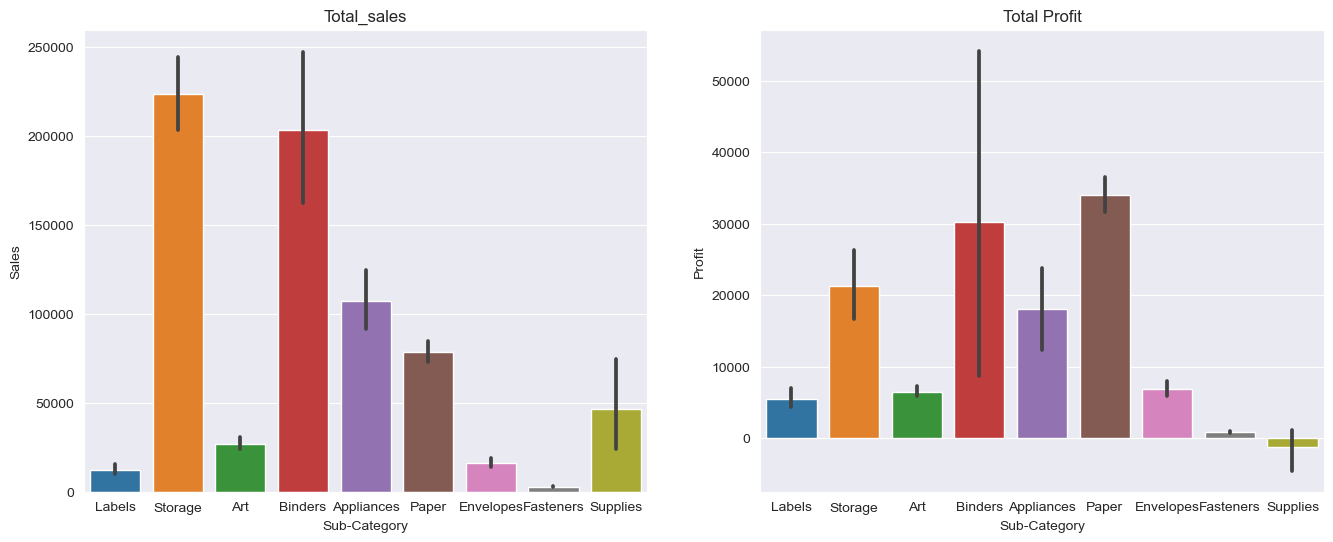

In [83]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.barplot(x='Sub-Category',y='Sales',estimator=sum, data = df[(df['Category']=='Office Supplies')],ax=axes[0])
axes[0].set_title('Total_sales')

sns.barplot(x='Sub-Category',y='Profit',estimator=sum, data = df[(df['Category']=='Office Supplies')],ax=axes[1])
axes[1].set_title('Total Profit')

#### Q:In which month are more sales made?

In [84]:
df['Month'] = df['Order Date'].dt.month
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


<Figure size 1800x800 with 0 Axes>

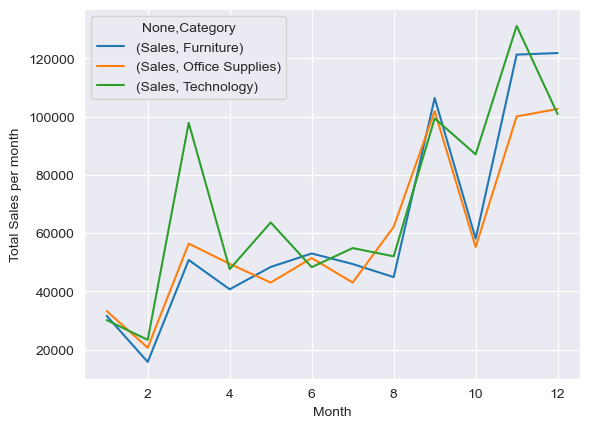

<Figure size 1800x800 with 0 Axes>

In [90]:
pd.pivot_table(df,index=['Month'],columns=['Category'],values=['Sales'],aggfunc='sum').plot()
plt.ylabel('Total Sales per month')

#### Q:In which month are more Profits made?

Text(0, 0.5, 'Total Profit per month')

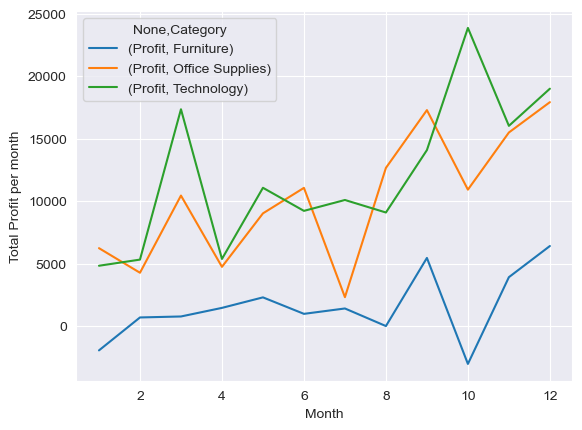

In [91]:
pd.pivot_table(df,index=['Month'],columns=['Category'],values=['Profit'],aggfunc='sum').plot()
plt.ylabel('Total Profit per month')

## Segment and Region Section

#### Q:Which segment generates the most orders?

In [95]:
order_df =df.Segment.value_counts()
order_df

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

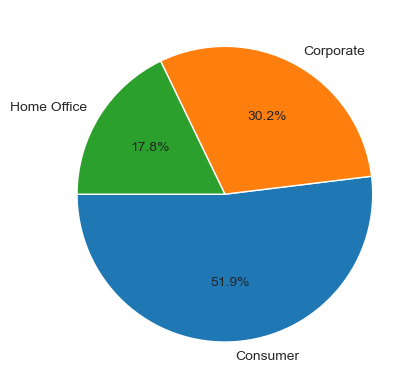

In [99]:
plt.pie(order_df,labels=order_df.index,autopct='%1.1f%%', startangle=180);

#### Q: Which Segment generates more Sales ?

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

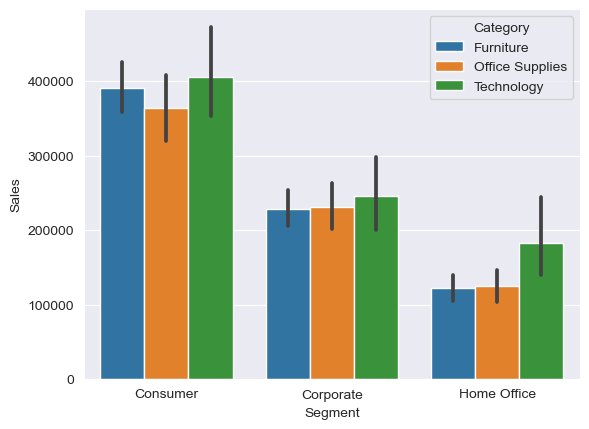

In [100]:
sns.barplot(x='Segment', y ='Sales', estimator=sum,hue='Category',data=df)

#### Q: Which Segment generates more Sales ?

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

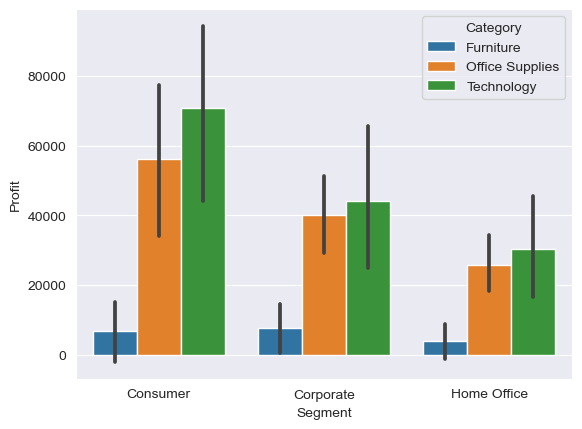

In [101]:
sns.barplot(x='Segment', y ='Profit', estimator=sum,hue='Category',data=df)

#### Q: Which region makes more Sales ?

<AxesSubplot:ylabel='Sales'>

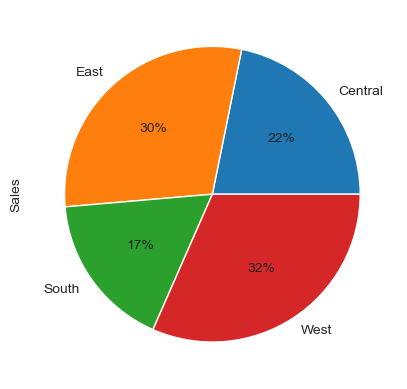

In [106]:
df.groupby('Region')['Sales'].sum().plot(kind='pie',autopct='%1.0f%%')

#### Q:Which region makes more Profit?

<AxesSubplot:ylabel='Profit'>

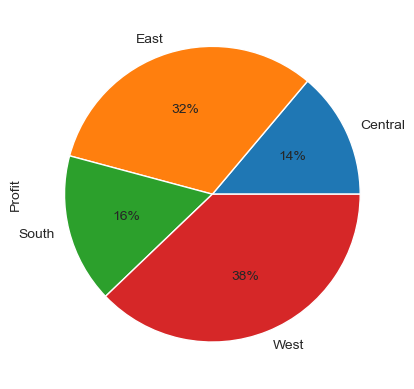

In [107]:
df.groupby('Region')['Profit'].sum().plot(kind='pie',autopct='%1.0f%%')

#### Q:Which category makes more profit and sales in each region?

Text(0.5, 1.0, 'Profit in each region')

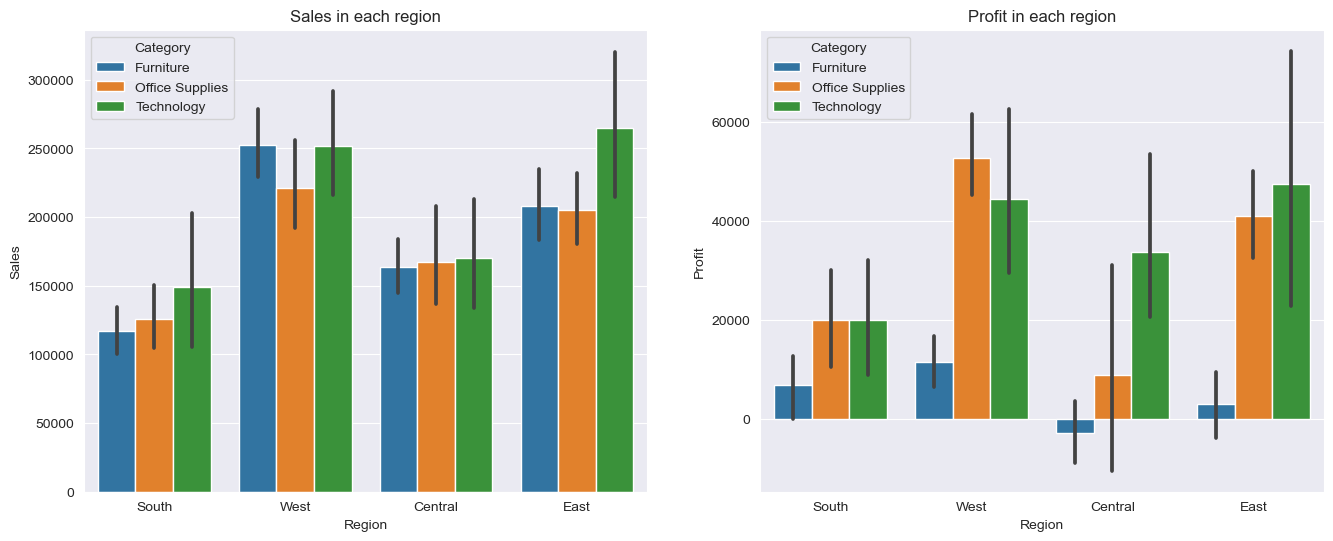

In [111]:
fig, axes = plt.subplots(1,2 ,figsize=(16,6))

sns.barplot(x='Region', y= 'Sales',estimator=sum, hue='Category',data=df,ax=axes[0])
axes[0].set_title('Sales in each region')

sns.barplot(x='Region', y= 'Profit',estimator=sum, hue='Category',data=df,ax=axes[1])
axes[1].set_title('Profit in each region')


## City and State Section

#### Q:Which are the top 10 cities with the most profit and sales?

In [114]:
top_city = pd.DataFrame(df.groupby('City')[['Sales','Profit']].sum().sort_values('Sales',ascending=False)[:10])
top_city

,Sales,Profit
City,,
New York City,256368.1610,62036.9837
Los Angeles,175851.3410,30440.7579
Seattle,119540.7420,29156.0967
San Francisco,112669.0920,17507.3854
Philadelphia,109077.0130,-13837.7674
Houston,64504.7604,-10153.5485
Chicago,48539.5410,-6654.5688
San Diego,47521.0290,6377.1960
Jacksonville,44713.1830,-2323.8350


Barplot shows top 10 city having more sales

<AxesSubplot:title={'center':'top 10 cities having more sales'}, xlabel='Sales', ylabel='City'>

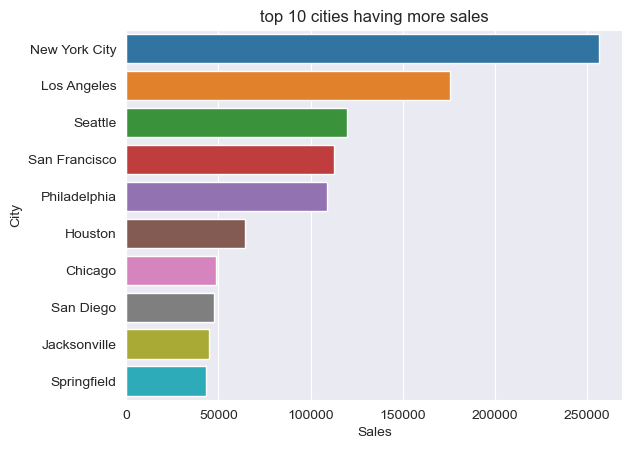

In [117]:
plt.title('top 10 cities having more sales')
sns.barplot(x='Sales',y=top_city.index,estimator=sum , data=top_city)

Barplot shows Top 10 cities having more Profit

In [119]:
city_profit= pd.DataFrame(df.groupby('City')['Profit'].sum().sort_values(ascending=False)[:10])

<AxesSubplot:title={'center':'top 10 cities having more Profit'}, xlabel='Profit', ylabel='City'>

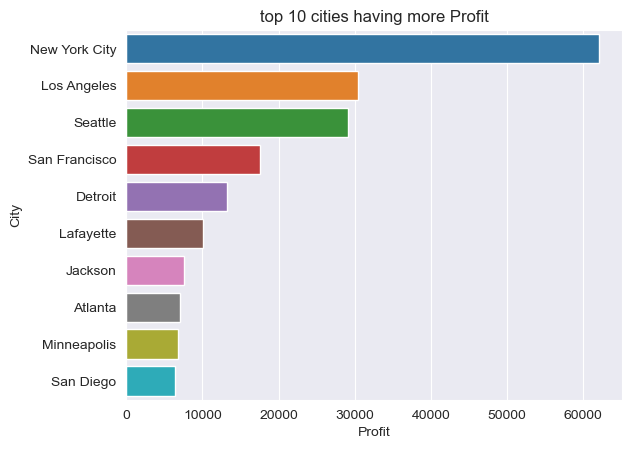

In [120]:
plt.title('top 10 cities having more Profit')
sns.barplot(x='Profit',y=city_profit.index,estimator=sum , data=city_profit)

#### Q: Top 10 state having more Sales ?

In [122]:
State_Sales= pd.DataFrame(df.groupby('State')['Sales'].sum().sort_values(ascending=False)[:10])

<AxesSubplot:title={'center':'top 10 States having more Sales'}, xlabel='Sales', ylabel='State'>

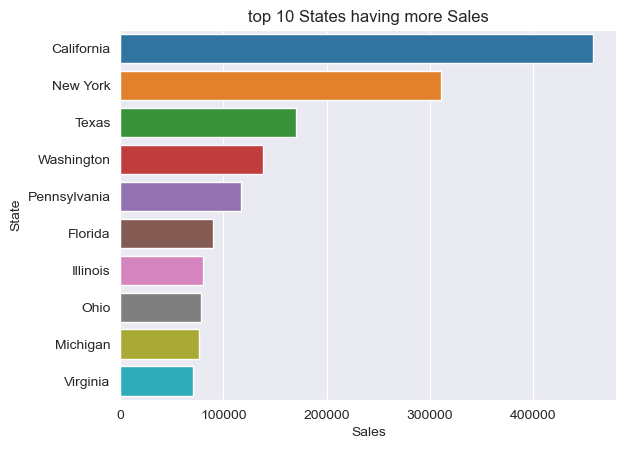

In [125]:
plt.title('top 10 States having more Sales')
sns.barplot(x='Sales',y=State_Sales.index,estimator=sum , data=State_Sales)

#### Q: Top 10 state having more Sales ?

In [126]:
state_profit= pd.DataFrame(df.groupby('State')['Profit'].sum().sort_values(ascending=False)[:10])

<AxesSubplot:title={'center':'top 10 States having more Profit'}, xlabel='Profit', ylabel='State'>

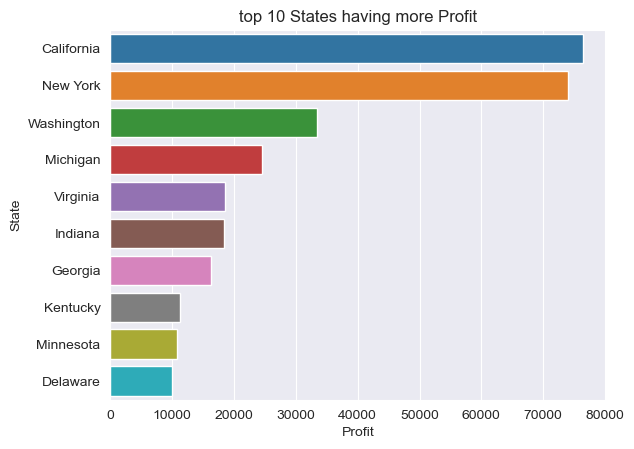

In [128]:
plt.title('top 10 States having more Profit')
sns.barplot(x='Profit',y=state_profit.index,estimator=sum , data=state_profit)

## Recommendations : -

* Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable.

* Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.

